In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-dataset-insurancehub-usa/House_price_multifeatures.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter('ignore')
df=pd.read_csv("/kaggle/input/house-price-prediction-dataset-insurancehub-usa/House_price_multifeatures.csv")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df.head()

,Unnamed: 0,Id,PropertyLocationStreet1,PropertyLocationStreet2,PropertyCity,CountyFIPS,PropertyZip,OwnerName,OwnerMailAddress1,OwnerMailAddress2,...,HydrantLatitude,HydrantLongitude,LastSalePrice,LastSaleDate,Homestead,FloodzoneLastUpdatedDate,StateParcelId,AssesmentYear,Geometry,TTTerritory
0,0,120210f35317ca697,503 LAKE LOUISE CIR,19-201,NAPLES,21.0,34110,"BOLTZ, LARRY P & SANDRA A",3739 WRENS NEST BLVD,NaN,...,NaN,NaN,NaN,NaN,False,2017-05-12 00:00:00,C21-000-188-9852-8,2015.0,NaN,541-0
1,0,12086db272d757be6,5934 NW 7 PL,NaN,MIAMI,86.0,33127,LILIANE MORISSETTE,5934 NW 7 PL,NaN,...,25.83045,-80.21022,NaN,NaN,True,2017-12-08 00:00:00,C23-000-198-3578-4,2015.0,NaN,032-0
2,0,12057c35a22b0865c,5713 PALM RIVER RD,NaN,TAMPA,57.0,33619,PADRON LUIS A,5713 PALM RIVER RD,NaN,...,27.94326,-82.39026,NaN,NaN,True,2031-01-01 00:00:00,C39-000-406-3313-3,2015.0,NaN,080-0
3,0,12057cf31f8e69893,1805 MAGDALENE MANOR DR,NaN,TAMPA,57.0,33613,BELLO CELESTE M,1805 MAGDALENE MANOR DR,NaN,...,28.07439,-82.47757,NaN,NaN,True,2018-04-04 00:00:00,C39-000-389-2623-4,2015.0,NaN,080-0
4,0,12057c5b7712cfb0b,7405 ALAFIA RIDGE LP,NaN,RIVERVIEW,57.0,33569,LANE ROY JR,7405 ALAFIA RIDGE LOOP,NaN,...,27.87574,-82.29307,NaN,NaN,True,2031-01-01 00:00:00,C39-000-414-6909-9,2015.0,NaN,080-0


In [4]:
df.columns

Index(['Unnamed: 0', 'Id', 'PropertyLocationStreet1',
       'PropertyLocationStreet2', 'PropertyCity', 'CountyFIPS', 'PropertyZip',
       'OwnerName', 'OwnerMailAddress1', 'OwnerMailAddress2', 'OwnerCity',
       'OwnerState', 'OwnerZip', 'CitizensTerritory', 'ConstructionType',
       'NumberOfStories', 'NumberOfFamilies', 'YearBuilt', 'YearofRoof',
       'YearofRoofVerified', 'RoofMaterial', 'AdjSquareFeet', 'Occupancy',
       'NumberOfMonthsUnoccupied', 'PPC', 'BCEG', 'TypeOfResidence',
       'FloorOfResidence', 'FloridaWindpool', 'DistancetoCoast',
       'DistancetoSinkhole', 'DistancetoHydrant', 'DistancetoFireDepartment',
       'FireDistrict', 'RespondingFireDepartment', 'CentralStationAlarm',
       'AutomaticSprinklers', 'NumberOfClaims', 'LocationWindSpeed',
       'DesignWindSpeed', 'InternalPressureDesign', 'WindborneDebrisRegion',
       'Terrain', 'RoofDeckAttachment', 'RoofCover', 'RooftoWallconnection',
       'SecondaryWaterResistance', 'OpeningProtection', 'Roof

In [5]:
df.drop (columns=['Unnamed: 0', 'Id','PropertyLocationStreet1',
       'PropertyLocationStreet2', 'PropertyCity','PropertyZip','OwnerName', 'OwnerMailAddress1', 'OwnerMailAddress2', 'OwnerCity',
       'OwnerState', 'OwnerZip','AssesmentYear', 'Geometry', 'TTTerritory'],inplace=True)

In [6]:
df.shape

(81747, 81)

In [7]:
df.isna().sum()

CountyFIPS                      8
CitizensTerritory              76
ConstructionType            20074
NumberOfStories             48911
NumberOfFamilies            81746
                            ...  
LastSalePrice               69927
LastSaleDate                69429
Homestead                      52
FloodzoneLastUpdatedDate       53
StateParcelId                 185
Length: 81, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81747 entries, 0 to 81746
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CountyFIPS                81739 non-null  float64
 1   CitizensTerritory         81671 non-null  float64
 2   ConstructionType          61673 non-null  object 
 3   NumberOfStories           32836 non-null  float64
 4   NumberOfFamilies          1 non-null      float64
 5   YearBuilt                 81692 non-null  float64
 6   YearofRoof                6419 non-null   float64
 7   YearofRoofVerified        81639 non-null  object 
 8   RoofMaterial              21064 non-null  object 
 9   AdjSquareFeet             81643 non-null  float64
 10  Occupancy                 0 non-null      float64
 11  NumberOfMonthsUnoccupied  0 non-null      float64
 12  PPC                       58334 non-null  object 
 13  BCEG                      18754 non-null  float64
 14  TypeOf

In [9]:
df.dropna(how='all',axis=1,inplace=True)

In [10]:
df.shape

(81747, 61)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81747 entries, 0 to 81746
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CountyFIPS                81739 non-null  float64
 1   CitizensTerritory         81671 non-null  float64
 2   ConstructionType          61673 non-null  object 
 3   NumberOfStories           32836 non-null  float64
 4   NumberOfFamilies          1 non-null      float64
 5   YearBuilt                 81692 non-null  float64
 6   YearofRoof                6419 non-null   float64
 7   YearofRoofVerified        81639 non-null  object 
 8   RoofMaterial              21064 non-null  object 
 9   AdjSquareFeet             81643 non-null  float64
 10  PPC                       58334 non-null  object 
 11  BCEG                      18754 non-null  float64
 12  TypeOfResidence           81747 non-null  object 
 13  FloorOfResidence          826 non-null    float64
 14  Florid

In [12]:
df.columns

Index(['CountyFIPS', 'CitizensTerritory', 'ConstructionType',
       'NumberOfStories', 'NumberOfFamilies', 'YearBuilt', 'YearofRoof',
       'YearofRoofVerified', 'RoofMaterial', 'AdjSquareFeet', 'PPC', 'BCEG',
       'TypeOfResidence', 'FloorOfResidence', 'FloridaWindpool',
       'DistancetoCoast', 'DistancetoSinkhole', 'DistancetoHydrant',
       'DistancetoFireDepartment', 'FireDistrict', 'RespondingFireDepartment',
       'LocationWindSpeed', 'WindborneDebrisRegion', 'Terrain', 'RoofShape',
       'DesignExposure', 'ValueofHome', 'UnattachedStructure', 'FarmsNRanches',
       'Vacant', 'FloodZone', 'ConstructedOverWater', 'Pool', 'ParcelSize',
       'ImprovementQuality', 'ImprovementQualityDate', 'NumberOfBuildings',
       'NumberOfUnits', 'PoliceID', 'FireID', 'CountyName', 'PropertyState',
       'CentroidLatitude', 'CentroidLongitude', 'CoastLatitude',
       'CoastLongitude', 'FireStationLatitude', 'FireStationLongitude',
       'SinkholeLatitude', 'SinkholeLongitude', 'Sin

In [13]:
df.drop(columns=['NumberOfFamilies','NumberOfStories','NumberOfBusiness','StateParcelId','LastSaleDate','HydrantLatitude','FireStationLatitude', 'FireStationLongitude','HydrantLatitude', 'HydrantLongitude','CentroidLatitude', 'CentroidLongitude','ImprovementQualityDate','PoliceID','SinkholeLatitude','CoastLatitude',
       'CoastLongitude','SinkholeLongitude', 'SinkholeId', 'SinkholeAddress'],inplace=True)

In [14]:
df.shape

(81747, 42)

In [15]:
df.columns

Index(['CountyFIPS', 'CitizensTerritory', 'ConstructionType', 'YearBuilt',
       'YearofRoof', 'YearofRoofVerified', 'RoofMaterial', 'AdjSquareFeet',
       'PPC', 'BCEG', 'TypeOfResidence', 'FloorOfResidence', 'FloridaWindpool',
       'DistancetoCoast', 'DistancetoSinkhole', 'DistancetoHydrant',
       'DistancetoFireDepartment', 'FireDistrict', 'RespondingFireDepartment',
       'LocationWindSpeed', 'WindborneDebrisRegion', 'Terrain', 'RoofShape',
       'DesignExposure', 'ValueofHome', 'UnattachedStructure', 'FarmsNRanches',
       'Vacant', 'FloodZone', 'ConstructedOverWater', 'Pool', 'ParcelSize',
       'ImprovementQuality', 'NumberOfBuildings', 'NumberOfUnits', 'FireID',
       'CountyName', 'PropertyState', 'EffectiveYearBuilt', 'LastSalePrice',
       'Homestead', 'FloodzoneLastUpdatedDate'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81747 entries, 0 to 81746
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CountyFIPS                81739 non-null  float64
 1   CitizensTerritory         81671 non-null  float64
 2   ConstructionType          61673 non-null  object 
 3   YearBuilt                 81692 non-null  float64
 4   YearofRoof                6419 non-null   float64
 5   YearofRoofVerified        81639 non-null  object 
 6   RoofMaterial              21064 non-null  object 
 7   AdjSquareFeet             81643 non-null  float64
 8   PPC                       58334 non-null  object 
 9   BCEG                      18754 non-null  float64
 10  TypeOfResidence           81747 non-null  object 
 11  FloorOfResidence          826 non-null    float64
 12  FloridaWindpool           18042 non-null  float64
 13  DistancetoCoast           81695 non-null  float64
 14  Distan

In [17]:
df.drop(columns=['BCEG','CitizensTerritory',
     'CountyFIPS','CountyName','DesignExposure',
     'EffectiveYearBuilt', 'FarmsNRanches', 'FireDistrict',
     'FireID', 'FloodZone', 'FloodzoneLastUpdatedDate',
     'FloorOfResidence', 'FloridaWindpool', 'LocationWindSpeed', 
     'PPC', 'ParcelSize', 'PropertyState', 'RespondingFireDepartment',
     'RoofMaterial', 'RoofShape','Terrain', 'UnattachedStructure',
     'Vacant', 'YearBuilt', 'YearofRoof', 'YearofRoofVerified'],inplace=True)

In [18]:
df.shape

(81747, 16)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81747 entries, 0 to 81746
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ConstructionType          61673 non-null  object 
 1   AdjSquareFeet             81643 non-null  float64
 2   TypeOfResidence           81747 non-null  object 
 3   DistancetoCoast           81695 non-null  float64
 4   DistancetoSinkhole        81504 non-null  float64
 5   DistancetoHydrant         36146 non-null  float64
 6   DistancetoFireDepartment  81669 non-null  float64
 7   WindborneDebrisRegion     81695 non-null  object 
 8   ValueofHome               81736 non-null  float64
 9   ConstructedOverWater      6669 non-null   object 
 10  Pool                      7126 non-null   object 
 11  ImprovementQuality        81607 non-null  object 
 12  NumberOfBuildings         77196 non-null  float64
 13  NumberOfUnits             81618 non-null  float64
 14  LastSa

In [20]:
# df['LastSalePrice','NumberOfBuildings'].fillna(0,inplace=True)
df['NumberOfUnits'].fillna(0,inplace=True)
df[['WindborneDebrisRegion']].fillna(0,inplace=True)
df.ConstructionType.fillna('OTHER',inplace=True)

In [21]:
df.isna().sum()

ConstructionType                0
AdjSquareFeet                 104
TypeOfResidence                 0
DistancetoCoast                52
DistancetoSinkhole            243
DistancetoHydrant           45601
DistancetoFireDepartment       78
WindborneDebrisRegion          52
ValueofHome                    11
ConstructedOverWater        75078
Pool                        74621
ImprovementQuality            140
NumberOfBuildings            4551
NumberOfUnits                   0
LastSalePrice               69927
Homestead                      52
dtype: int64

In [22]:
df.ImprovementQuality.value_counts()

ImprovementQuality
AVERAGE             48940
ABOVE AVERAGE       18876
BELOW AVERAGE        9458
EXCELLENT            3008
MINIMUM/LOW COST     1132
SUPERIOR              193
Name: count, dtype: int64

In [23]:
df.ConstructionType.fillna('OTHER',inplace=True)
df.AdjSquareFeet.fillna(df.AdjSquareFeet.mean(),inplace=True)
df.ConstructionType.fillna('OTHER',inplace=True)
df.WindborneDebrisRegion.fillna(False,inplace=True)
df.DistancetoCoast.fillna(0,inplace=True)
df.DistancetoSinkhole.fillna(0,inplace=True)
df.DistancetoHydrant.fillna(0,inplace=True)
df.DistancetoFireDepartment.fillna(0,inplace=True)
df.ImprovementQuality.fillna('no data',inplace=True)
df.NumberOfBuildings.fillna(0,inplace=True)
df['LastSalePrice'].fillna(0,inplace=True)
df['ConstructedOverWater'].fillna(False,inplace=True)
df.Pool.fillna(False,inplace=True)
df['Homestead'].fillna(False,inplace=True) 

In [24]:
df.isna().sum()

ConstructionType             0
AdjSquareFeet                0
TypeOfResidence              0
DistancetoCoast              0
DistancetoSinkhole           0
DistancetoHydrant            0
DistancetoFireDepartment     0
WindborneDebrisRegion        0
ValueofHome                 11
ConstructedOverWater         0
Pool                         0
ImprovementQuality           0
NumberOfBuildings            0
NumberOfUnits                0
LastSalePrice                0
Homestead                    0
dtype: int64

In [25]:
df.dropna(inplace=True)
df.shape

(81736, 16)

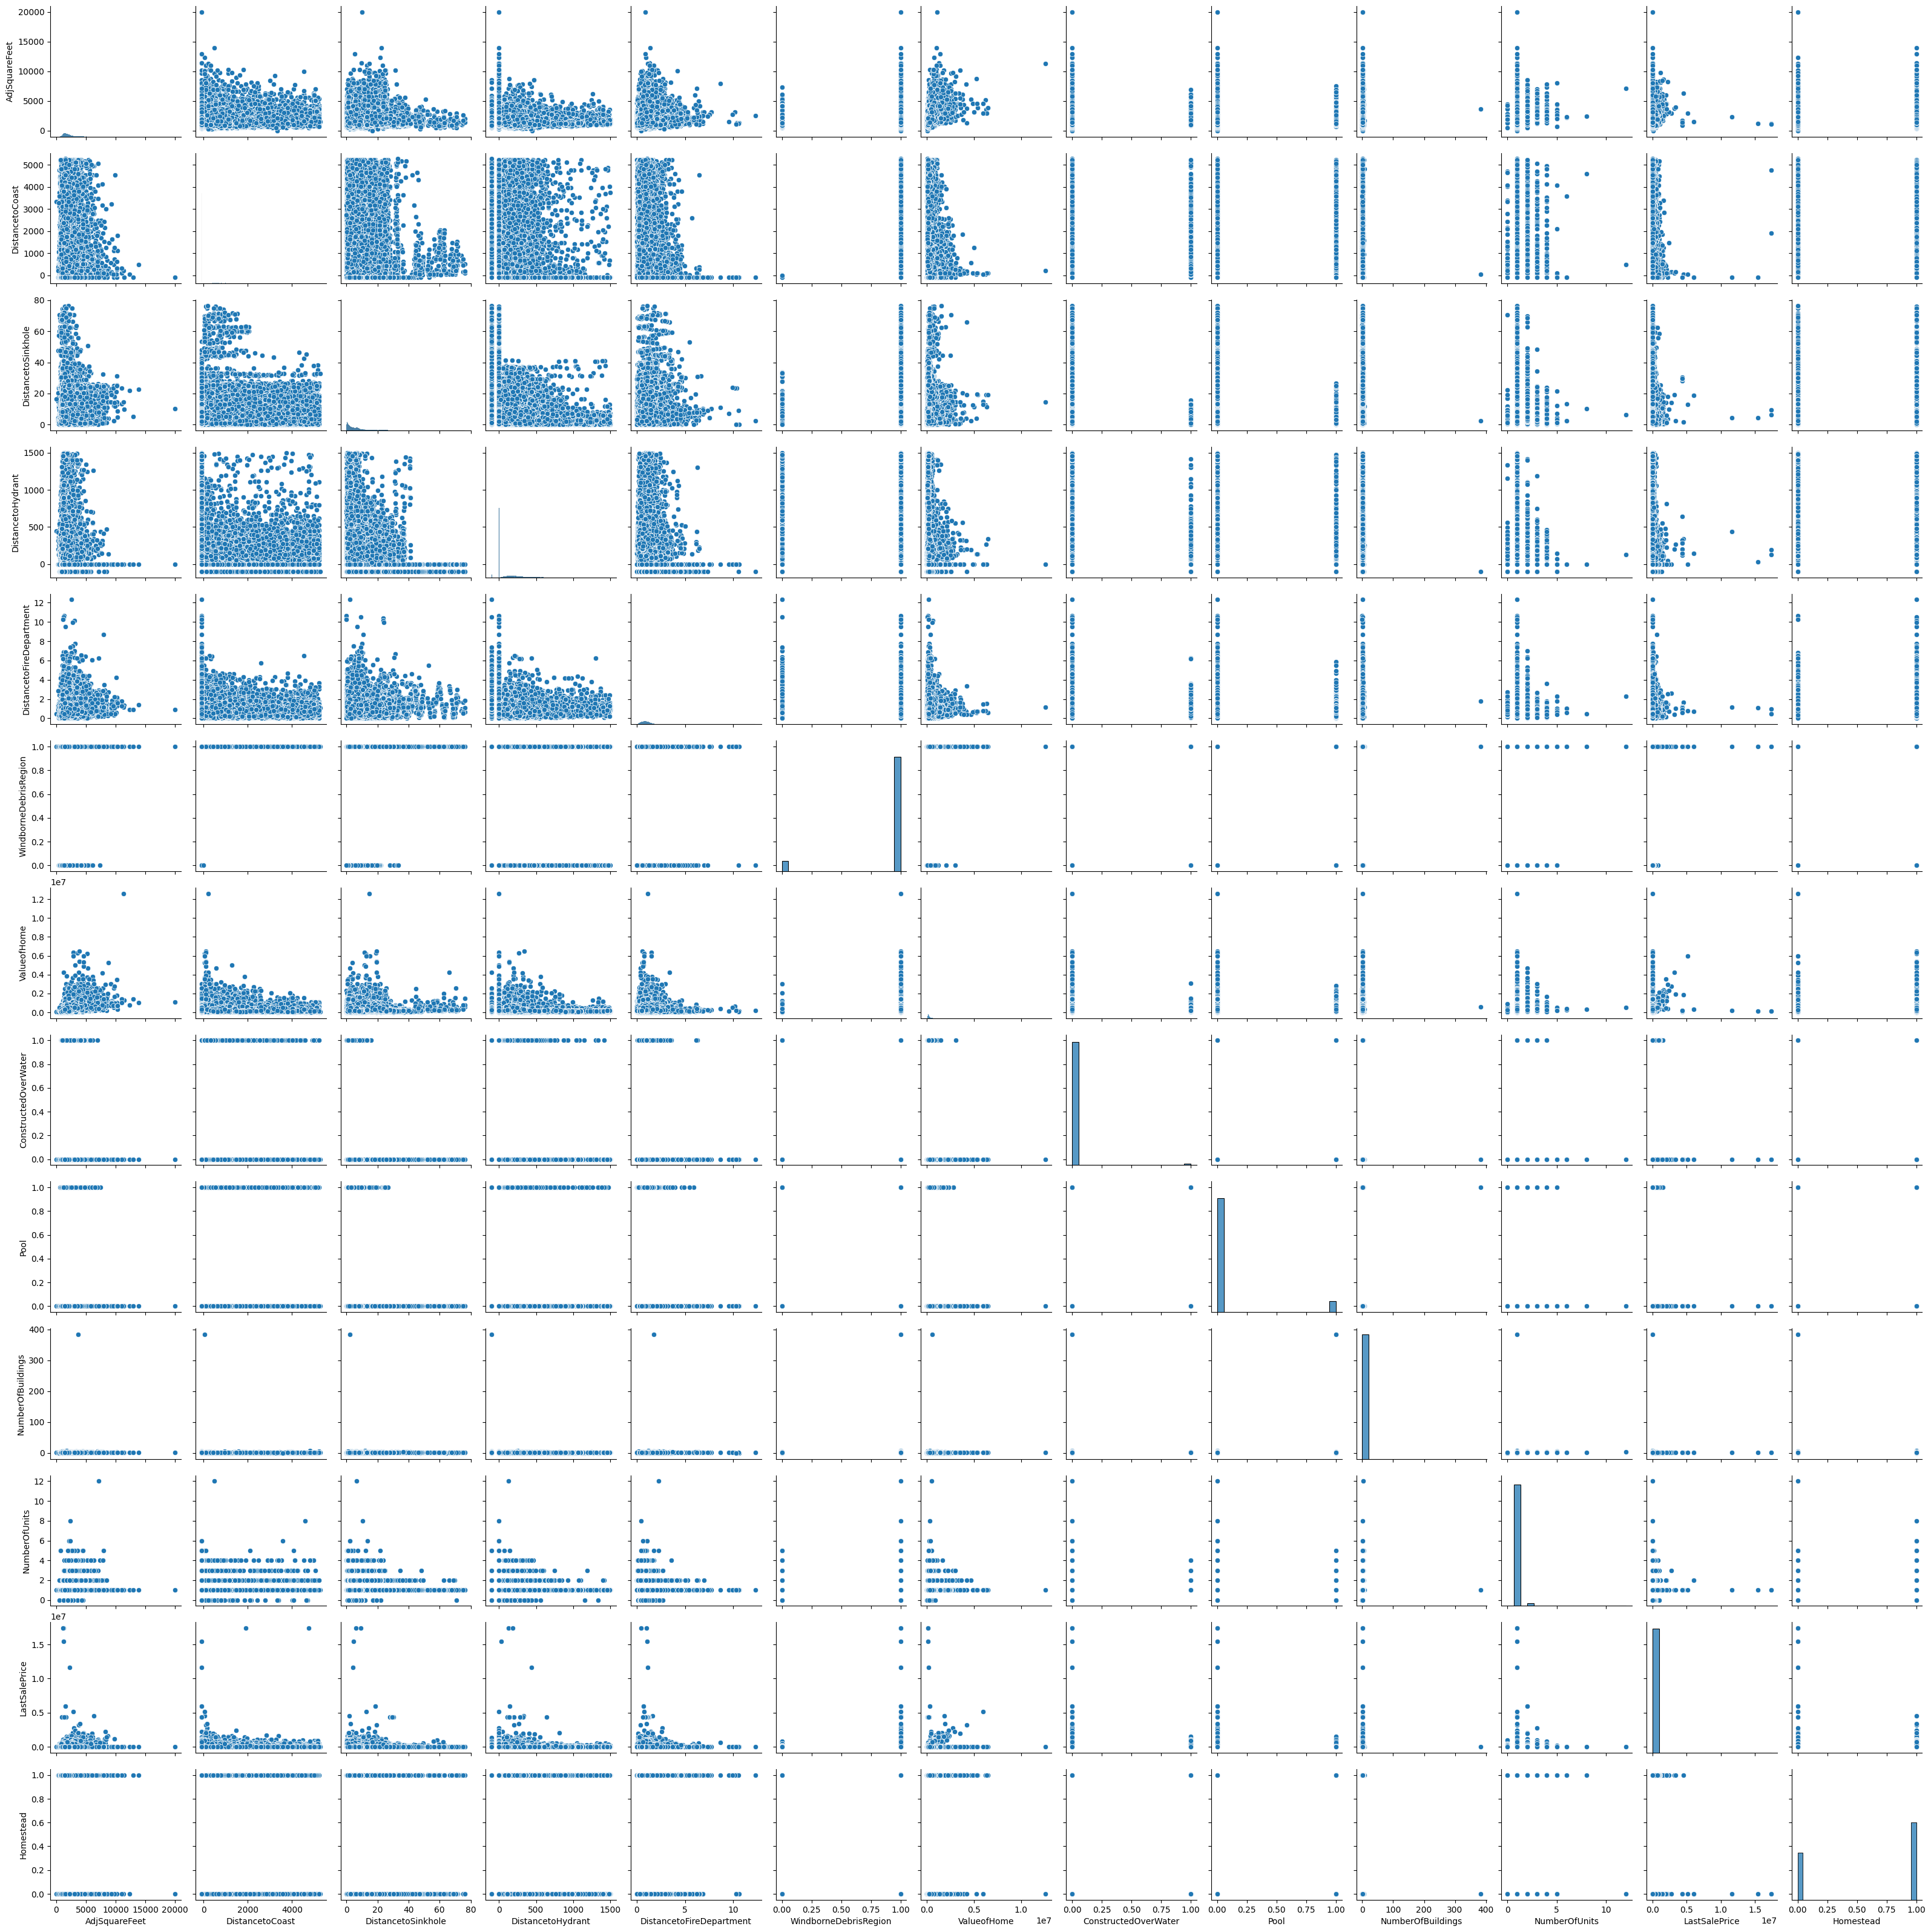

In [26]:
sns.pairplot(df)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81736 entries, 0 to 81746
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ConstructionType          81736 non-null  object 
 1   AdjSquareFeet             81736 non-null  float64
 2   TypeOfResidence           81736 non-null  object 
 3   DistancetoCoast           81736 non-null  float64
 4   DistancetoSinkhole        81736 non-null  float64
 5   DistancetoHydrant         81736 non-null  float64
 6   DistancetoFireDepartment  81736 non-null  float64
 7   WindborneDebrisRegion     81736 non-null  bool   
 8   ValueofHome               81736 non-null  float64
 9   ConstructedOverWater      81736 non-null  bool   
 10  Pool                      81736 non-null  bool   
 11  ImprovementQuality        81736 non-null  object 
 12  NumberOfBuildings         81736 non-null  float64
 13  NumberOfUnits             81736 non-null  float64
 14  LastSalePri

In [28]:
column=df.columns
column=list(column)

In [29]:
objectcol=list(df.select_dtypes(include='object').columns)
numCol=list(df.select_dtypes(include=np.number).columns)

In [30]:
objectcol

['ConstructionType', 'TypeOfResidence', 'ImprovementQuality']

In [31]:
numCol

['AdjSquareFeet',
 'DistancetoCoast',
 'DistancetoSinkhole',
 'DistancetoHydrant',
 'DistancetoFireDepartment',
 'ValueofHome',
 'NumberOfBuildings',
 'NumberOfUnits',
 'LastSalePrice']

In [32]:
y=df.ValueofHome
x=df.drop('ValueofHome',axis=1) 

In [33]:
x['Homestead'].value_counts()

Homestead
True     50935
False    30801
Name: count, dtype: int64

In [34]:
['ConstructionType',
 'TypeOfResidence',
 'WindborneDebrisRegion',
 'ConstructedOverWater',
 'Pool',
 'ImprovementQuality',
 'Homestead']

['ConstructionType',
 'TypeOfResidence',
 'WindborneDebrisRegion',
 'ConstructedOverWater',
 'Pool',
 'ImprovementQuality',
 'Homestead']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23,test_size=.2)

In [36]:
x_train.columns

Index(['ConstructionType', 'AdjSquareFeet', 'TypeOfResidence',
       'DistancetoCoast', 'DistancetoSinkhole', 'DistancetoHydrant',
       'DistancetoFireDepartment', 'WindborneDebrisRegion',
       'ConstructedOverWater', 'Pool', 'ImprovementQuality',
       'NumberOfBuildings', 'NumberOfUnits', 'LastSalePrice', 'Homestead'],
      dtype='object')

In [37]:
x

,ConstructionType,AdjSquareFeet,TypeOfResidence,DistancetoCoast,DistancetoSinkhole,DistancetoHydrant,DistancetoFireDepartment,WindborneDebrisRegion,ConstructedOverWater,Pool,ImprovementQuality,NumberOfBuildings,NumberOfUnits,LastSalePrice,Homestead
0,OTHER,1384.0,CONDO STACKED,2956.8,0.00,0.00,1.20,True,False,False,ABOVE AVERAGE,0.0,1.0,0.0,False
1,OTHER,1534.0,SINGLE FAMILY,-99.0,9.56,195.70,0.98,True,False,False,ABOVE AVERAGE,1.0,1.0,0.0,True
2,MASONRY,2612.0,SINGLE FAMILY,-99.0,0.82,159.63,0.05,True,False,False,AVERAGE,1.0,1.0,0.0,True
3,MASONRY,2848.0,SINGLE FAMILY,-99.0,0.39,194.63,1.69,True,False,False,ABOVE AVERAGE,1.0,1.0,0.0,True
4,MASONRY,1936.0,SINGLE FAMILY,-99.0,1.09,371.98,1.37,True,False,False,AVERAGE,1.0,1.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81742,MASONRY,2163.0,SINGLE FAMILY,422.4,25.42,0.00,0.52,True,False,False,AVERAGE,1.0,1.0,0.0,True
81743,MASONRY,2163.0,SINGLE FAMILY,422.4,25.42,0.00,0.52,True,False,False,AVERAGE,1.0,1.0,0.0,True
81744,OTHER,1892.0,SINGLE FAMILY,-99.0,16.74,244.79,0.66,True,False,False,EXCELLENT,1.0,1.0,735000.0,True
81745,MASONRY,1325.0,SINGLE FAMILY,-99.0,1.97,0.00,0.49,True,False,False,AVERAGE,1.0,1.0,0.0,True


In [38]:
# for x in ['ConstructionType','TypeOfResidence']:
#    print( x_train[x].value_counts())

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
ct = ColumnTransformer(
            [
                ('text_preprocess',OneHotEncoder(handle_unknown='ignore',drop='first'),['ConstructionType','TypeOfResidence']),            
                ('text_preprocess 2',OrdinalEncoder(),(['Pool','Homestead','ConstructedOverWater','WindborneDebrisRegion'])),            
                ('text_preprocess 3',OrdinalEncoder(),['ImprovementQuality']),           
                ('num_preprocess',StandardScaler(),['AdjSquareFeet', 'DistancetoCoast', 'DistancetoFireDepartment', 'DistancetoHydrant', 'DistancetoSinkhole',
 'LastSalePrice', 'NumberOfBuildings', 'NumberOfUnits'])
            ]
)                                       
                                    
x_train = ct.fit_transform(x_train) 
x_test=ct.transform(x_test)



<Axes: >

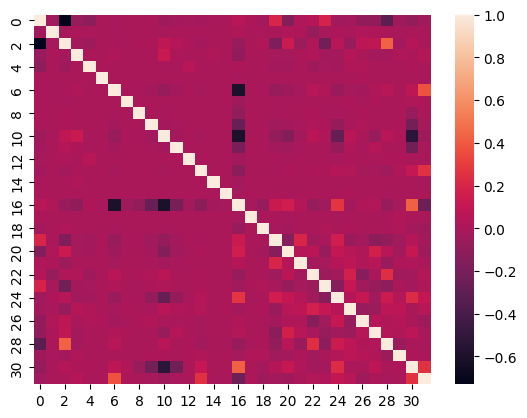

In [40]:
sns.heatmap(pd.DataFrame(x_train).corr('spearman'))

In [41]:
x_train.shape

(65388, 32)

In [42]:
x_test.shape

(16348, 32)

In [43]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [44]:
# MOdel
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=32))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1,activation='linear'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 399
Trainable params: 399
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='MAPE',optimizer='Adam',metrics='MAPE')
history=model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs=100,validation_split=.3,initial_epoch=7)

Epoch 8/100
2044/2044 [==============================] - 11s 3ms/step - loss: 97.5330 - MAPE: 97.5330 - val_loss: 89.3844 - val_MAPE: 89.3844
Epoch 9/100
2044/2044 [==============================] - 7s 3ms/step - loss: 68.3634 - MAPE: 68.3634 - val_loss: 53.1585 - val_MAPE: 53.1585
Epoch 10/100
2044/2044 [==============================] - 7s 3ms/step - loss: 49.7418 - MAPE: 49.7418 - val_loss: 48.3301 - val_MAPE: 48.3301
Epoch 11/100
2044/2044 [==============================] - 7s 3ms/step - loss: 46.5550 - MAPE: 46.5550 - val_loss: 45.7473 - val_MAPE: 45.7473
Epoch 12/100
2044/2044 [==============================] - 7s 3ms/step - loss: 44.1204 - MAPE: 44.1204 - val_loss: 43.5098 - val_MAPE: 43.5098
Epoch 13/100
2044/2044 [==============================] - 7s 3ms/step - loss: 41.9436 - MAPE: 41.9436 - val_loss: 41.5022 - val_MAPE: 41.5022
Epoch 14/100
2044/2044 [==============================] - 7s 3ms/step - loss: 40.0391 - MAPE: 40.0391 - val_loss: 39.7440 - val_MAPE: 39.7440
Epoch 1

In [47]:
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_pred=y_pred,y_true=y_test)



511/511 [==============================] - 1s 1ms/step


0.18975087175095195

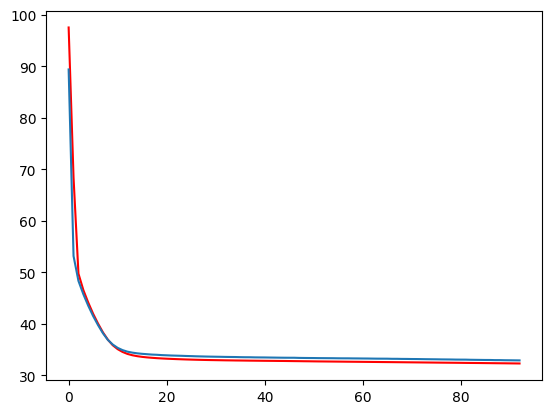

In [48]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],)

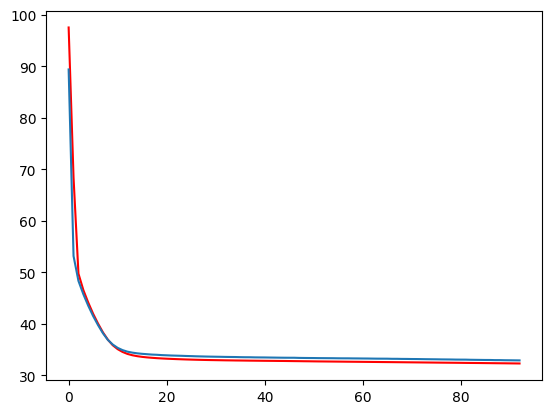

In [49]:
plt.plot(history.history['MAPE'],color='red')
plt.plot(history.history['val_MAPE'],)



In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
m1={
    'Random Forest':RandomForestRegressor(),
    'LinearRegression':LinearRegression(),
    'Decision Tree':DecisionTreeRegressor(),
    'Support Vector Machine':SVR(),
    'XGB':XGBRegressor()
}
from sklearn.metrics import accuracy_score


def eval_model(x_train,y_train,x_test,y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(x_train,y_train)

        y_model_pred=model.predict(x_test)
        
        model_score=r2_score(y_true=y_test,y_pred=y_model_pred)
        report[list(models.keys())[i]]=model_score
        # report.update({list(models.keys())[i]:model_score})

    return report

eval_model(x_train,y_train,x_test,y_test,m1)

{'Random Forest': 0.7665082734070224,
 'LinearRegression': 0.36422635482478993,
 'Decision Tree': 0.5681585603275984,
 'Support Vector Machine': -0.0638409117020724,
 'XGB': 0.7004740755048389}